## The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Frame the Problem and Look at the Big Picture

<b>1.</b> Our objective is to create a classifier model that when feed with 'new' (unseen) data can tell if that person would survive or not.

<b>2.</b> In my point of view the solution has no other pratical use than studying the parameters to 'choose' who survived used by those on board of the Titanic tripulation, in other words we should answer the question: “what sorts of people were more likely to survive?”

<b>3.</b> There are already a lot of solutions to that problem, one of then is:
https://www.youtube.com/watch?v=f1y9wDDxWnA&list=FLmP-iX_Ox9GP1MjQ4J6dI1w&index=8&t=0s

Which we will not be follwing, but can be a reference point in any struggle we have

<b>4.</b> In my point of view we should tackle ir as a problem with the follwing characteristics:
.supervised learning (k-nearest neighbors/ SVMs/....)   (Can it perform better with unsupervised learning? Clustering methods: K-means, DBSCAN, HCA...)
.offline
.model-based learning


<b>5.</b> We should evaluate our models usign a confusion matrix and optimizing for the best precision/recall trade-off. In order to achieve that we can use the multiclass classification or the single class classication method depending on the model being evaluated.

F1 score!


<b>6.</b> I think the performace measurement is very aligned with the objective

<b>7.</b> (80% precision with a high recall?)

<b>8.</b> I'll try to reuse some concepts used learned in the chapter 3- image classification problem.

<b>9.</b> Till now, just mine (and online resources)

<b>10.</b> I would try to find some easy patterns in the data (maybe gender or age)

<b>11.</b> None (come back later)

<b>12.</b> 
....

## Get the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer

The problem already splits the data into a train and a test dataset.
First of all we will use the train dataset to train our models...

In [2]:
#Loading the data into a pandas data frame

Data = pd.read_csv("train.csv")
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Descriptions
<b>Survival:</b> 0 = No, 1 = Yes

<b>pclass (Ticket class):</b> 1 = 1st, 2 = 2nd, 3 = 3rd

<b>sex:</b> Sex

<b>Age:</b> Age in years

<b>sibsp:</b> number of siblings/spouses aboard the Titanic

<b>parch:</b> number of parents/children aboard the Titanic

<b>ticket:</b> Ticket number

<b>fare:</b> Passenger fare

<b>cabin:</b> Cabin number

<b>embarked:</b> Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


The 'Embarked' colunm contains 2 null values, we will replace it with the higher frequency value

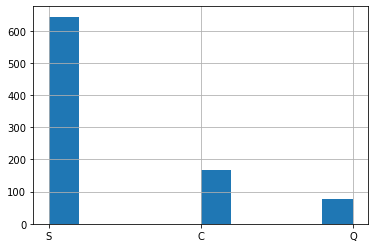

In [4]:
Data['Embarked'].hist()

In [5]:
# replacing na values in Embarked with S 
Data["Embarked"].fillna("S", inplace = True)

The 'Cabin' colunm is missing a lot of entries although I do not think that it is a important feature to our model (as we already have the 'Pclass' colunm which tell us about the social class) so we should not care about that. 


*Talvez a cabine seja relevante (será que era caro ter uma cabine? Podemos criar uma feature do tipo binary 0- nao tem cabine , 1- tem cabine) 

We can also see that the 'Age' colunm is missing 177 entries, but in that case I guess it is a very important feature...
First let's see how is that data written

In [6]:
#Dropping some irrelevant features

Data = Data.drop(['Name','PassengerId','Ticket'], axis=1)

In [7]:
Age_colunm = Data['Age'].values

Age_colunm

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [8]:
Data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Creating a new attribute

As the cabin name itself does not provide any usefull information we will create a new colunm saying if the person had or not a cabin

In [9]:
# replacing na values in Cabin with 0 
Data["Cabin"].fillna("0", inplace = True) 
  

# Creating a list with those attributes    
binary_cabin = [int(cabin) if cabin == '0' else 1 for cabin in Data['Cabin']]

# Integrating the new colunm in the data frame
Data["BCabin"] = binary_cabin

Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,BCabin
0,0,3,male,22.0,1,0,7.2500,0,S,0
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,0,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,0,S,0


But how should we tackle that problem? Should we just drop those people? Use the average values for the 'null' entries? What are the consequences of that? 

*Ps. Later in the feature enginnering the median value approach is used to replace the null values of the 'Age'colunm

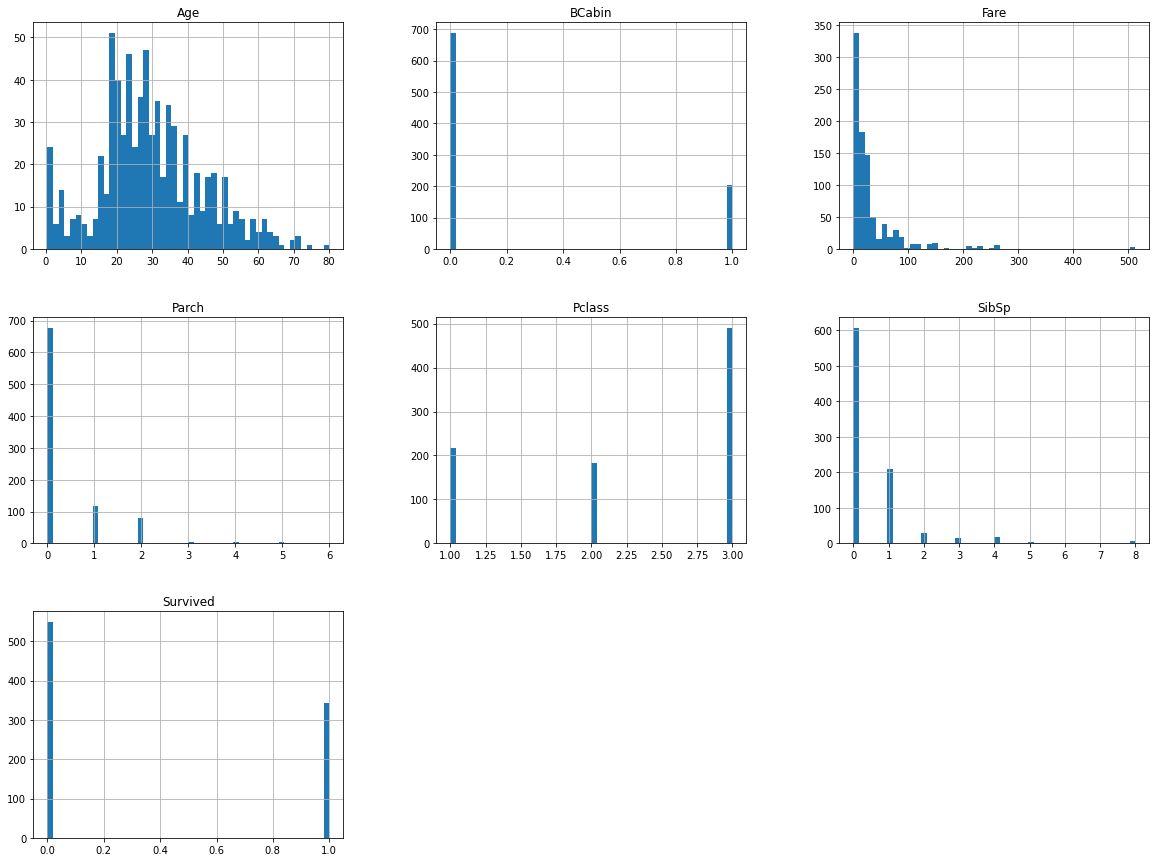

In [10]:
Data.hist(bins=50, figsize=(20,15)) 
plt.show()

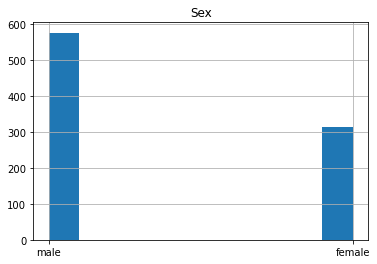

male      577
female    314
Name: Sex, dtype: int64

In [11]:
Data["Sex"].hist()
plt.title("Sex")
plt.show()
Data.Sex.value_counts()

In [12]:
# 0 = Died
# 1 = Survived

Data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Looking at the histograms we can extract some information to have an overview about the problem.
We can see that the mojority of people does not have a cabin (what does that means? Does it mean that the cabin was not in their name but register in someone of his family? How does someone goes in a 'boat' trip without a cabin?), also the majority was from the lower social class (3), the tripulation was majority male, and other things... 

Is important to freeze that if the survival aspect was random we must expect to see a simmilar distribution of those attributes..

We know that 549 people died and 342 survived, we must analyse the distribution in these cases.

In [13]:
# Creating a hist plot of survivors and dead

indexes = ["Age","BCabin","Fare","Parch","Pclass","SibSp","Sex"]

def suv_hist(survived, index):
    Data.loc[Data['Survived'] == survived][index].hist(bins=50, figsize=(20,15))
    plt.title(index)
    



Histograms of the dead data


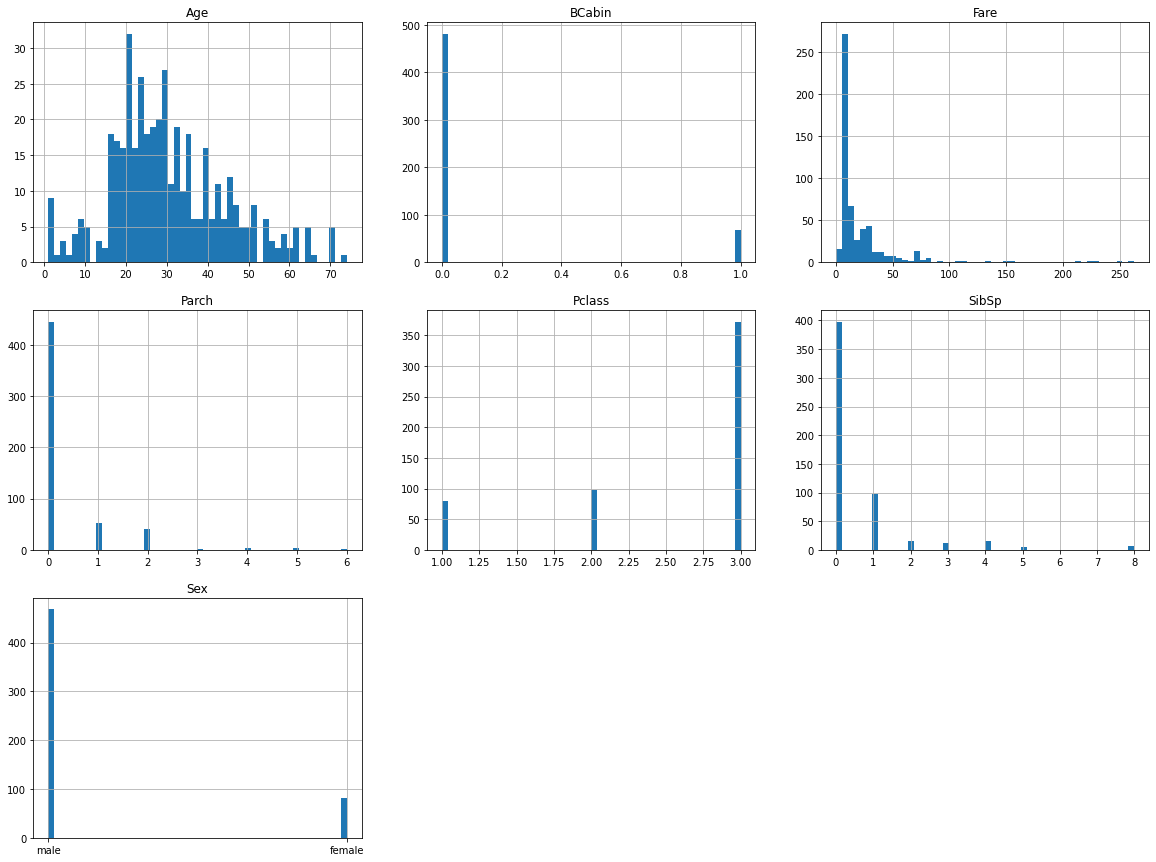

In [14]:
# For the dead data:
print("Histograms of the dead data")

i = 1
for index in indexes:
    plt.subplot(3, 3, i)
    i += 1
    suv_hist(0,index)

Histograms of the survivor data


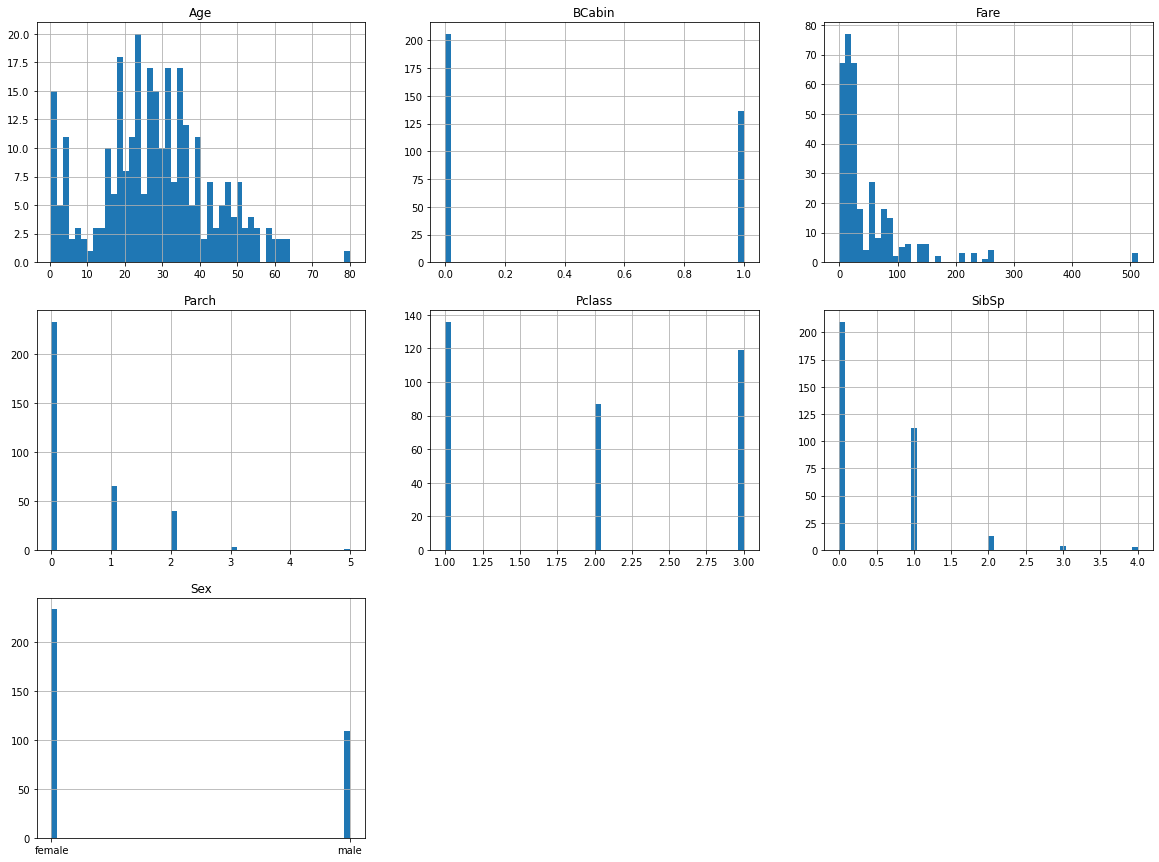

In [15]:
# For the survivor data:
print("Histograms of the survivor data")

i = 1
for index in indexes:
    plt.subplot(3, 3, i)
    i += 1
    suv_hist(1,index)

<b> Jaja comento melhor </b> 

As we can see by those histograms the survivors distribution does not follows the inicial distribution of tripulants, which disclaims the hypoteses of a "random survival fact. In other words, there were certains parrameters/methods to 'select' who would be saved (actually that would be the main hypotesis for now, but the difference in the distribution could be by other factors, but we all know the history, so, let's move on)  

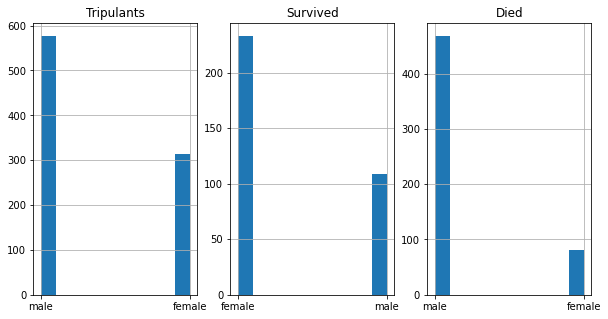

Tripulants:
male      577
female    314
Name: Sex, dtype: int64

Survived:
female    233
male      109
Name: Sex, dtype: int64

Died:
male      468
female     81
Name: Sex, dtype: int64



In [16]:
# A kick exemple of the change in distribution using the "Sex" cathegory

# raw
plt.subplot(1, 3, 1)
Data["Sex"].hist(figsize=(10,5))
plt.title("Tripulants")
#Data.Sex.value_counts()

# survived
plt.subplot(1, 3, 2)
Data.loc[Data['Survived'] == 1]['Sex'].hist(figsize=(10,5))
plt.title("Survived")
#Data.loc[Data['Survived'] == 1]['Sex'].value_counts()

# dead
plt.subplot(1, 3, 3)
Data.loc[Data['Survived'] == 0]['Sex'].hist(figsize=(10,5))
plt.title("Died")
#Data.loc[Data['Survived'] == 0]['Sex'].value_counts()


plt.show()


print(f"\033[1mTripulants:\033[0m\n{Data.Sex.value_counts()}\n")
print(f"\033[1mSurvived:\033[0m\n{Data.loc[Data['Survived'] == 1]['Sex'].value_counts()}\n")
print(f"\033[1mDied:\033[0m\n{Data.loc[Data['Survived'] == 0]['Sex'].value_counts()}\n")

## Feature transformation

In [17]:
#Reverting to a clean data set
#Separing the predictions and labels, since we don´t necessarily want to apply the same transformations on then

Data_labels = Data["Survived"].copy()
Data = Data.drop("Survived", axis=1) 

Compute the median value on the training set and use it to fill the missing values in the training set. Don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system, and also once the system goes live to replace missing values in new data.

In [18]:
imputer = SimpleImputer(strategy="median") 

# Since the median can only be calculated for numerical attributes we have to create a copy of the data without ... 
#... the text attribute and categorical attributes
#Note that the pclass attribute is a cattegorical attribute, we wanna handle it separeted

Data_num = Data.drop(['Sex','Cabin','Embarked','Pclass','BCabin'], axis=1)

In [19]:
# Fitting the imputer instance in the trainning data using the fit() method:

imputer.fit(Data_num)

#The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [20]:
imputer.statistics_

array([28.    ,  0.    ,  0.    , 14.4542])

In [21]:
#Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians:

X = imputer.transform(Data_num) 

# The result is a plain NumPy array containing the transformed features. 

In [22]:
# To put it back into a pandas dataframe:

Data_tr = pd.DataFrame(X, columns=Data_num.columns,   
                          index=Data_num.index)



## Handling text and categorical attributes

In [23]:
#Selecting the desire attributes

Data_cat = Data[['Sex','Embarked','Pclass','BCabin']]
Data_cat.head(10)

,Sex,Embarked,Pclass,BCabin
0,male,S,3,0
1,female,C,1,1
2,female,S,3,0
3,female,S,1,1
4,male,S,3,0
5,male,Q,3,0
6,male,S,1,1
7,male,S,3,0
8,female,S,3,0
9,female,C,2,0


We can see that the sex and embarked attributes are also cattegories, so we should convert those values into numbers (machine learning algorithms works way better with numbers)

In [24]:
from sklearn.preprocessing import OrdinalEncoder 
ordinal_encoder = OrdinalEncoder() 
Data_cat_encoded = ordinal_encoder.fit_transform(Data_cat)
Data_cat_encoded[:10]

array([[1., 2., 2., 0.],
       [0., 0., 0., 1.],
       [0., 2., 2., 0.],
       [0., 2., 0., 1.],
       [1., 2., 2., 0.],
       [1., 1., 2., 0.],
       [1., 2., 0., 1.],
       [1., 2., 2., 0.],
       [0., 2., 2., 0.],
       [0., 0., 1., 0.]])

In [25]:
# You can get the list of categories using the categories_ instance variable.
ordinal_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array([1, 2, 3], dtype=int64),
 array([0, 1], dtype=int64)]

In [26]:
# We now shall convert these values into one-hot vector

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
Data_cat_1hot = cat_encoder.fit_transform(Data_cat) 
Data_cat_1hot 

<891x10 sparse matrix of type '<class 'numpy.float64'>'
	with 3564 stored elements in Compressed Sparse Row format>

In [27]:
Data_cat_1hot.toarray() 

array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

# Transformation pipelines

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We will also apply the standarlization method to our numerical data

In [29]:
#Pipeline for the numerical data

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [30]:
Data_num_tr = num_pipeline.fit_transform(Data_num) #fitting the numerical data into the numerical pipeline

In [31]:
Data_num_tr

array([[-0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [ 0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [-0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

Using a colunm pipeline to handle all data at once

In [32]:
from sklearn.compose import ColumnTransformer 

# Note that this pipeline make ALL THE ABOVE STEPS AT ONCE
# In other words, we compiled all the "feature transformation" section into this cell, if we want we can delet all the other ones


num_attribs = list(Data_num)
cat_attribs = ['Sex','Embarked','Pclass','BCabin']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

Data_prepared = full_pipeline.fit_transform(Data)

# Select and Train a Model

### Define a function to fit machine learning algorithms

In [33]:
# importing all the models we wanna test

from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


In [34]:
# Function that runs an algorithm and returns it's F1 score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

def fit_model(algo, X_train, Y_train, cv):
    
    # Making predctions using the cross_val_predict
    y_train_pred = cross_val_predict(algo, X_train, Y_train, cv=cv)
    
    # Evaluate precision
    precision = precision_score(Y_train, y_train_pred) 
    
    # Evaluate recall
    recall =  recall_score(Y_train, y_train_pred)
    
    # Evaluate the F1 score
    F1_score = f1_score(Y_train, y_train_pred)
    
    return round( (100*precision),2), round( (100*recall),2), round( (100*F1_score),2)


### K-Nearest_Neighbors

In [35]:
KNN_precision, KNN_recall, KNN_f1 = fit_model(KNeighborsClassifier(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"K-NearestNeighbors\nPrecision: {KNN_precision}\nRecall: {KNN_recall}\nF1: {KNN_f1}")

K-NearestNeighbors
Precision: 77.7
Recall: 69.3
F1: 73.26


### Logistic Regression

In [36]:
LR_precision, LR_recall, LR_f1 = fit_model(LogisticRegression(), 
                   Data_prepared, 
                   Data_labels, 
                   10)
                                           
                                           
print(f"Logistic Regression\nPrecision: {LR_precision}\nRecall: {LR_recall}\nF1: {LR_f1}")                                           

Logistic Regression
Precision: 76.09
Recall: 71.64
F1: 73.8


### Suport Vector Machine

In [37]:
SVM_precision, SVM_recall, SVM_f1 = fit_model(svm.SVC(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Suport Vector Machine\nPrecision: {SVM_precision}\nRecall: {SVM_recall}\nF1: {SVM_f1}")

Suport Vector Machine
Precision: 81.21
Recall: 70.76
F1: 75.63


### Gaussian Naive Bayes

In [38]:
GNB_precision, GNB_recall, GNB_f1 = fit_model(GaussianNB(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Gaussian Naive Bayes\nPrecision: {GNB_precision}\nRecall: {GNB_recall}\nF1: {GNB_f1}")

Gaussian Naive Bayes
Precision: 67.75
Recall: 79.24
F1: 73.05


### Stochastic Gradient Descent

In [39]:
SGD_precision, SGD_recall, SGD_f1 = fit_model(SGDClassifier(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Stochastic Gradient Descent\nPrecision: {SGD_precision}\nRecall: {SGD_recall}\nF1: {SGD_f1}")

Stochastic Gradient Descent
Precision: 67.3
Recall: 72.81
F1: 69.94


### Decision Tree Classifier

In [40]:
DTC_precision, DTC_recall, DTC_f1 = fit_model(DecisionTreeClassifier(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Decision Tree Classifier\nPrecision: {DTC_precision}\nRecall: {DTC_recall}\nF1: {DTC_f1}")

Decision Tree Classifier
Precision: 72.86
Recall: 72.22
F1: 72.54


### Gradient Boost Trees

In [41]:
GBT_precision, GBT_recall, GBT_f1 = fit_model(GradientBoostingClassifier(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Gradient Boost Trees\nPrecision: {GBT_precision}\nRecall: {GBT_recall}\nF1: {GBT_f1}")

Gradient Boost Trees
Precision: 81.27
Recall: 71.05
F1: 75.82


### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestClassifier
RFR_precision, RFR_recall, RFR_f1 = fit_model(RandomForestClassifier(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"Random Forest Regressor\nPrecision: {RFR_precision}\nRecall: {RFR_recall}\nF1: {RFR_f1}")

Random Forest Regressor
Precision: 75.3
Recall: 73.1
F1: 74.18


## Model results

In [43]:
precision_scores = [KNN_precision, LR_precision, SVM_precision, GNB_precision, SGD_precision, DTC_precision, GBT_precision]
recall_scores = [KNN_recall, LR_recall, SVM_recall, GNB_recall, SGD_recall, DTC_recall, GBT_recall]
f1_scores = [KNN_f1, LR_f1, SVM_f1, GNB_f1, SGD_f1, DTC_f1, GBT_f1]


# Scores data frame

score_df = pd.DataFrame({
    'Model': ['K-NearestNeighbors','Logistic Regression',
              'Support Vector Machines','Gaussian Naive Bayes',
              'Stochastic Gradient Descent','Decision Tree Classifier',
              'Gradient Boost Trees'],
    
    'F1 Score':
    f1_scores,
    
    'Precision Score':
    precision_scores,
    
    'Recall Score':
    recall_scores
    

})

print('---Harmoic Mean Scores---')
score_df.sort_values(by='F1 Score', ascending=False)


---Harmoic Mean Scores---


,Model,F1 Score,Precision Score,Recall Score
6,Gradient Boost Trees,75.82,81.27,71.05
2,Support Vector Machines,75.63,81.21,70.76
1,Logistic Regression,73.80,76.09,71.64
0,K-NearestNeighbors,73.26,77.70,69.30
3,Gaussian Naive Bayes,73.05,67.75,79.24
5,Decision Tree Classifier,72.54,72.86,72.22
4,Stochastic Gradient Descent,69.94,67.30,72.81


We can see that our best model so far is the Gradient Boost Tree, achieving a 81.27% precision with a 71.05% recall, resulting in a F1 score of 75.82%

This result is very good, considering that a random guess (survived or not) should result in a 50% precision, so our model gives us a much better precision than the previous one (random guesses) 

### Feature importance (of the first 3 models)

Age, Score: 0.13527855245080223
SibSp, Score: 0.04559987822599244
Parch, Score: 0.0019553354605671303
Fara, Score: 0.1557315385132377
female, Score: 0.2646240258062522
male, Score: 0.21091873484184395
C, Score: 0.002608298023547432
Q, Score: 0.0007925127939912004
S, Score: 0.014549333196598483
SC1, Score: 0.003923200909468482
SC2, Score: 0.0006862718389453759
SC3, Score: 0.11924703096939993
nC, Score: 0.014614116084415377
wC, Score: 0.02947117088493796


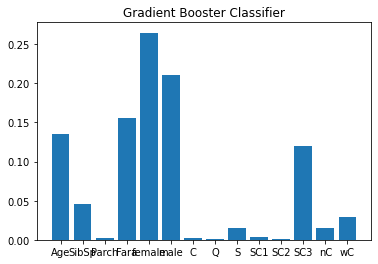

In [44]:
from matplotlib import pyplot


gbt = GradientBoostingClassifier()
gbt.fit(Data_prepared, Data_labels)


attribs = list(Data)
importance = gbt.feature_importances_

#sorted(zip(importance, attribs), reverse=True)
#importance

# summarize feature importance
feat_names = ['Age','SibSp','Parch','Fara','female','male','C','Q','S','SC1','SC2','SC3','nC','wC']
for i,v in zip(importance,feat_names):
	print(f'{v}, Score: {i}')
# plot feature importance
# [x for x in range(len(importance))]
pyplot.bar(feat_names, importance)
plt.title('Gradient Booster Classifier')
pyplot.show()

In [45]:
# Support vector machine

GBT_precision, GBT_recall, GBT_f1 = fit_model(svm.SVC(), 
                   Data_prepared, 
                   Data_labels, 
                   10)

print(f"K-NearestNeighbors\nPrecision: {GBT_precision}\nRecall: {GBT_recall}\nF1: {GBT_f1}")

K-NearestNeighbors
Precision: 81.21
Recall: 70.76
F1: 75.63


Unfortunally (as far as I know) we just have a function for feature importance of a svc when we use a linear kernel, which is not the case and if we do that we will get bad results...

Age, Score: 0.4861912491695453
SibSp, Score: 0.33955926717194723
Parch, Score: 0.0904329653273658
Fara, Score: 0.1091009362645561
female, Score: 1.325262605205762
male, Score: 1.3251782351111847
C, Score: 0.1885316378924817
Q, Score: 0.09308326130721924
S, Score: 0.28153052910512943
SC1, Score: 0.5061601991636295
SC2, Score: 0.3214600878290378
SC3, Score: 0.827535916898096
nC, Score: 0.48789279333267194
wC, Score: 0.4879771634272407


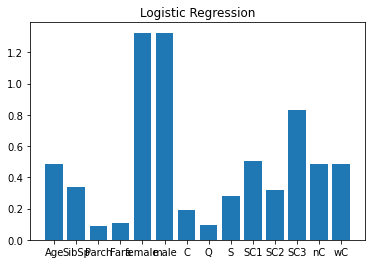

In [48]:
from matplotlib import pyplot

# define the model
model = LogisticRegression()
# fit the model
model.fit(Data_prepared, Data_labels)
# get importance
importance = abs(model.coef_[0])



# summarize feature importance
feat_names = ['Age','SibSp','Parch','Fara','female','male','C','Q','S','SC1','SC2','SC3','nC','wC']
for i,v in zip(importance,feat_names):
	print(f'{v}, Score: {i}')
# plot feature importance
# [x for x in range(len(importance))]
pyplot.bar(feat_names, importance)
plt.title("Logistic Regression")
pyplot.show()



In [49]:
# Importing the test set

Test_set = pd.read_csv("test.csv")
Test_PassengerId = Test_set['PassengerId'].values

Test_set = Test_set.drop(['Name','PassengerId','Ticket'], axis=1)

In [50]:
Test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


As we can see the data set looks very different than the one used to train the models, in orther to use our models and make predictions we should pass it through the pipeline and also add the new feature columns...

In [51]:
# Creating the 'BCabin' attribute

# replacing na values in Cabin with 0 
Test_set["Cabin"].fillna("0", inplace = True) 
  

# Creating a list with those attributes    
binary_cabin = [int(cabin) if cabin == '0' else 1 for cabin in Test_set['Cabin']]

# Integrating the new colunm in the data frame
Test_set["BCabin"] = binary_cabin

Test_set.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,BCabin
0,3,male,34.5,0,0,7.8292,0,Q,0
1,3,female,47.0,1,0,7.0000,0,S,0
2,2,male,62.0,0,0,9.6875,0,Q,0
3,3,male,27.0,0,0,8.6625,0,S,0
4,3,female,22.0,1,1,12.2875,0,S,0


In [52]:
# Numerical features:

Test_num = Test_set.drop(['Sex','Cabin','Embarked','Pclass','BCabin'], axis=1)


In [53]:
# Applying the pipeline

num_attribs = list(Test_num)

Test_prepared = full_pipeline.transform(Test_set)

## Predictions and submissions

### Gradient boost

In [53]:
# Making predictions using the Gradient Boost model

final_predictions = gbt.predict(Test_prepared)

In [54]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
final_predictions[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0],
      dtype=int64)

In [56]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = Test_PassengerId
submission['Survived'] = final_predictions # our model predictions on the test dataset
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [61]:
# Are our test and submission dataframes the same length?
if len(submission) == len(Test_set):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [65]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('gradient_booster.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [66]:

# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("gradient_booster.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Support vector machine

In [67]:
# define the model
model = svm.SVC()
# fit the model
model.fit(Data_prepared, Data_labels)

# Making predictions using the Gradient Boost model

predictions = model.predict(Test_prepared)

In [68]:
predictions[:20]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [70]:
# Create a submisison dataframe and append the relevant columns
svm_submission = pd.DataFrame()
svm_submission['PassengerId'] = Test_PassengerId
svm_submission['Survived'] = predictions # our model predictions on the test dataset
svm_submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [72]:
# Are our test and submission dataframes the same length?
if len(svm_submission) == len(Test_set):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [75]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
svm_submission.to_csv('SVM.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [76]:
# Check the submission csv to make sure it's in the right format
svm_submissions_check = pd.read_csv("SVM.csv")
svm_submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


## Conclusion

Comento melhor depois...

We got a better score with the gradient boost classifier achieving a score of 0.79, although we did not tunned any of the models (when we did with the gbc we got worst results than before) that could be a way of improving our scores...
Another way could be studying better the problem to understand the data better and maybe create some new features or something like that... 



As far as I'm concerned a 0.79 score is a good score for that problem, we can say that our model brings a good improvement to our predictions.